In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

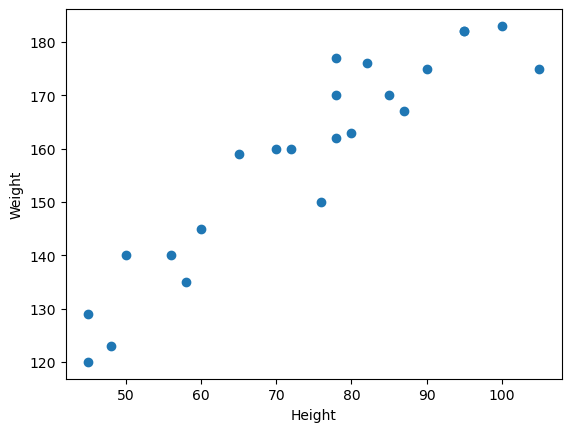

In [4]:
plt.scatter(df.Weight,df.Height)
plt.xlabel('Height')
plt.ylabel('Weight')

- Divide the dataset into independent and dependent features.
- Divide the data into train-test-split
- Standardizing the feature

In [5]:
y = df['Height'] # dependent feature
x = df[['Weight']] #independent feature

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

Standardize the train_independent feature only

In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [10]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

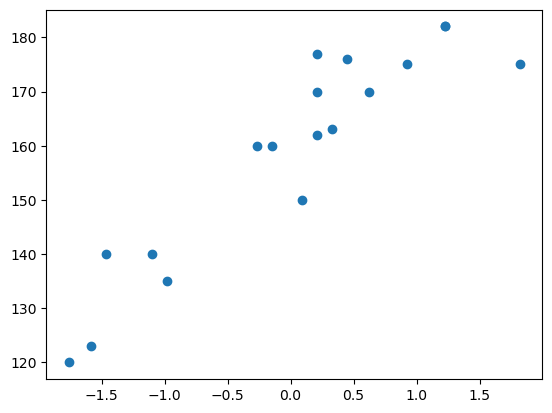

In [11]:
plt.scatter(x_train,y_train)

In [13]:
# Train the model with simple linear Regression
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
print("The value of slope(theta1)",reg.coef_)
print("The value of Intercept(theta0)",reg.intercept_)

The value of slope(theta1) [17.73635106]
The value of Intercept(theta0) 158.88888888888889


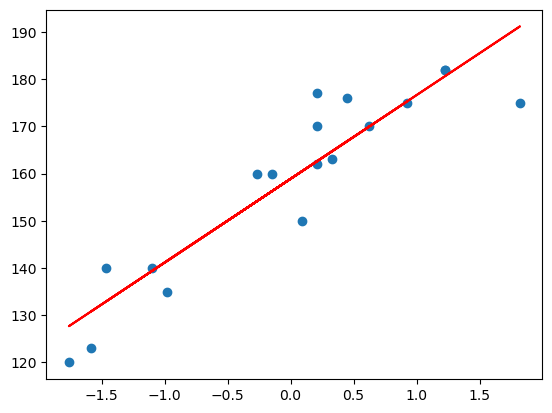

In [19]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),'r')

In [20]:
model_pred = reg.predict(x_test)

In [21]:
model_pred,y_test

(array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
        172.11139655]),
 20    129
 17    159
 3     145
 13    183
 19    167
 Name: Height, dtype: int64)

# Performance

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
mse = mean_squared_error(y_test,model_pred)

In [25]:
mae = mean_absolute_error(y_test,model_pred)
rmse = np.sqrt(mse)

In [26]:
mse,mae,rmse

(28.276946048811972, 4.179973432576932, 5.317607173232334)

In [27]:
from sklearn.metrics import r2_score

In [28]:
score = r2_score(y_test,model_pred)

In [29]:
score

0.9171832648523548

In [30]:
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8895776864698064

In [31]:
# New prediction
scaled_weight = std.transform([[80]])
scaled_weight

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32802144]])

In [34]:
print('The prediction for the weight 80 is ',reg.predict(scaled_weight))

The prediction for the weight 80 is  [164.70679226]


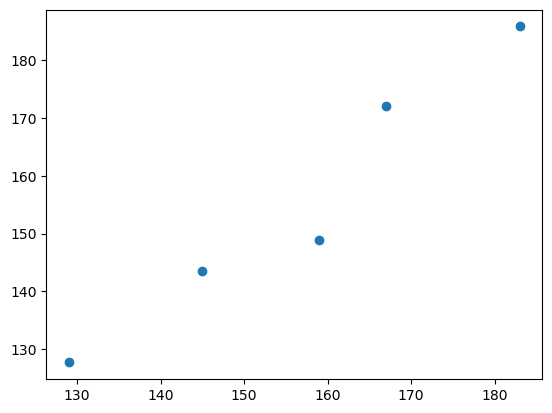

In [35]:
plt.scatter(y_test,model_pred)

# Mulitple Linear Regression

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = fetch_california_housing()

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
data = pd.DataFrame(df.data,columns = df.feature_names)

In [7]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
data['Price'] = df.target

In [9]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [12]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


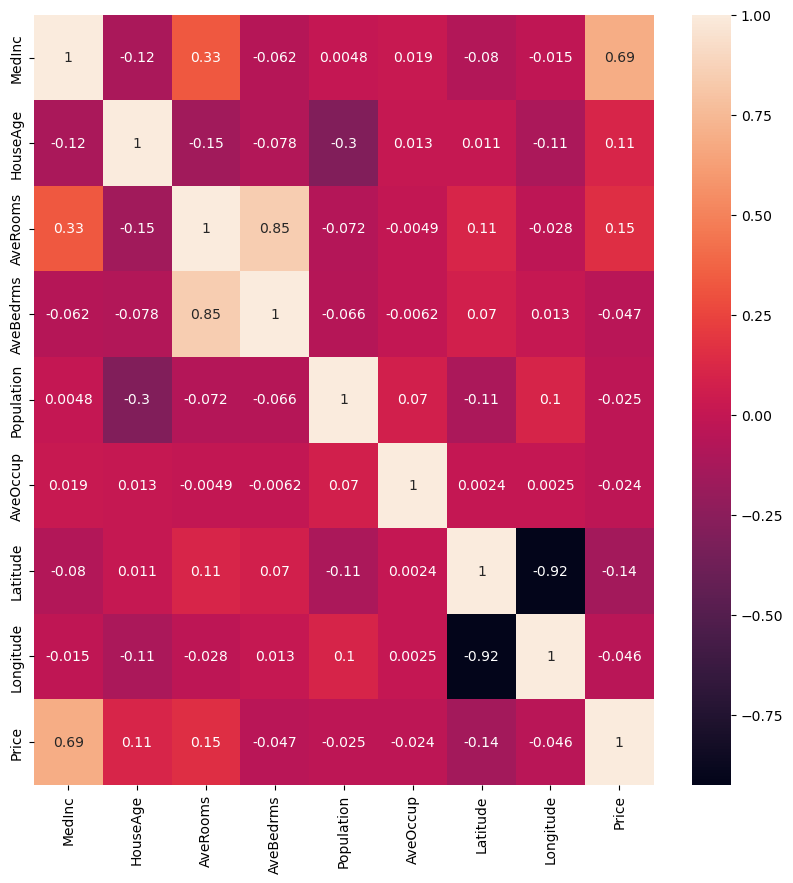

In [19]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=90)
plt.show()

In [20]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [31]:
x = data.iloc[:,:-1] #independent features
y = data.iloc[:,-1] #dependent features

In [32]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [34]:
x.shape,y.shape

((20640, 8), (20640,))

In [33]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [39]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [40]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [41]:
# Model Training
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [48]:
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
reg.coef_ #slope or coefficient

array([ 0.82955799,  0.12192011, -0.27366196,  0.32062002, -0.00413182,
       -0.03998331, -0.91029471, -0.88451415])

In [50]:
reg.intercept_ #intercept

2.077350641957363

In [51]:
model_pred = reg.predict(x_test)

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,model_pred)
mse = mean_squared_error(y_test,model_pred)
rmse = np.sqrt(mean_squared_error(y_test,model_pred))

In [53]:
mse,mae,rmse

(0.5291402345397309, 0.5328685121247785, 0.7274202599183851)

In [54]:
from sklearn.metrics import r2_score
score = r2_score(y_test,model_pred)

In [55]:
score

0.5965968374812353

In [56]:
1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5958133402003054

In [57]:
import pickle

In [58]:
pickle.dump(reg,open('regression.pkl','wb'))

In [59]:
model = pickle.load(open('regression.pkl','rb'))

In [60]:
model.predict(x_test)

array([2.12567705, 0.93977118, 2.70887192, ..., 2.9460839 , 2.63875476,
       1.46985176])